In [70]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
import time

In [2]:
def clean(data):
    data["Age"] = data["Age"].fillna(data["Age"].mean())
    data["Embarked"] = data["Embarked"].fillna("S")
    data.dropna(subset = ["Cabin"])
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    return data

In [49]:
# get titanic & test csv files as a DataFrame
data = pd.read_csv("./train.csv", dtype={"Age": np.float64}, )
data = clean(data)
predictors = ["Pclass","Sex","Age","Embarked","SibSp"]
#predictors = ["Pclass","Sex","Age","Embarked","SibSp","Parch","Fare"]
X = data[predictors]
y = data['Survived']

In [50]:
def checkPCA(data):
    pca = PCA(n_components = None)
    X_pca = pca.fit_transform(data)
    print pca.explained_variance_ratio_
    
    tot = sum(pca.explained_variance_ratio_)
    var_exp = [(i/tot) for i in (pca.explained_variance_ratio_)]
    cum_var_exp = np.cumsum(var_exp)

    ind = np.arange(len(pca.explained_variance_ratio_))
    plt.bar(ind, var_exp, alpha=0.2, align='center', label='individual variance')
    plt.step(ind, cum_var_exp,where='mid',label='cumulative variance')
    plt.xlabel('Principal components')
    plt.ylabel('Explained variance')
    plt.legend(loc='best')
    plt.show()

[ 0.98599832  0.00672787  0.00369303  0.00238383  0.00119695]


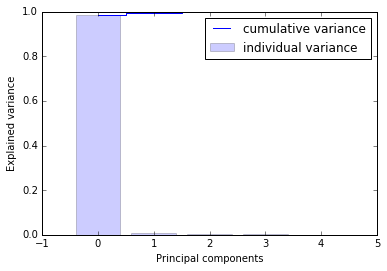

In [51]:
checkPCA(X)

In [69]:
pipe_knn_g = Pipeline([('scl',StandardScaler()),
                       ('clf',KNeighborsClassifier())])                        

In [65]:
# define the KNN grid parameters
neighbors = range(1,100)
weights = ['uniform','distance']
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
distance = ['euclidean','manhattan','minkowski']
param_grid_knn = [{'clf__n_neighbors':neighbors,
                   'clf__algorithm':algo,
                   'clf__metric':distance,
                   'clf__weights':weights}]

In [66]:
gs = GridSearchCV(estimator=pipe_knn_g,
                 param_grid = param_grid_knn,
                 scoring='accuracy',
                 cv=10)

In [72]:
gs = gs.fit(X,y)

In [73]:
print(gs.best_params_)
print(gs.best_score_)

{'clf__metric': 'manhattan', 'clf__weights': 'uniform', 'clf__algorithm': 'auto', 'clf__n_neighbors': 22}
0.818181818182
